In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.ndimage as ndimage
%matplotlib inline

# Part 1: Basics

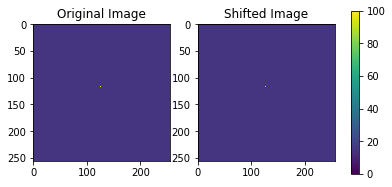

In [3]:
img1 = 15*np.ones((256,256))
img1[116,126] = 100
img2 = ndimage.shift(img1, [0.24, 0.0003])


fig, ax = plt.subplots(1,2)
plot1 = ax[0].imshow(img1, cmap='viridis', vmin=0, vmax=100)
plot2 = ax[1].imshow(img2, cmap='viridis', vmin=0, vmax=100)
cbar = plt.colorbar(plot2, location='right', ax=ax, fraction=0.05, shrink=0.75)
ax[0].set_title('Original Image')
ax[1].set_title('Shifted Image')
plt.show()

[[  0.99220343+0.00000000e+00j  45.94579553-2.20805271e+00j
  -43.7833127 +4.41075659e+00j ...  45.51294295+6.60289344e+00j
  -43.7833127 -4.41075659e+00j  45.94579553+2.20805271e+00j]
 [ 44.06229776-1.30687009e+01j   1.16613744-6.53489657e-02j
    0.836945  +6.16271923e-02j ...   1.17454334-3.17619764e-02j
    0.82690298+2.85519777e-02j   1.17116468-4.87619444e-02j]
 [-36.41620196+2.49888798e+01j   0.858188  +9.33353445e-02j
    1.13634403-1.23747181e-01j ...   0.84040333+6.36922870e-02j
    1.15556393-9.49536339e-02j   0.84856681+7.89506767e-02j]
 ...
 [ 29.54754161+3.48031409e+01j   1.11835436+1.48419255e-01j
    0.87506053-1.07127737e-01j ...   1.09056745+1.69056495e-01j
    0.90180176-1.29044671e-01j   1.1049671 +1.59420404e-01j]
 [-36.41620196-2.49888798e+01j   0.84856681-7.89506767e-02j
    1.15556393+9.49536339e-02j ...   0.86917426-1.06707616e-01j
    1.13634403+1.23747181e-01j   0.858188  -9.33353445e-02j]
 [ 44.06229776+1.30687009e+01j   1.17116468+4.87619444e-02j
    0.8269

/home/jbc1216/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


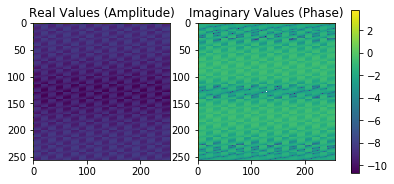

In [18]:
from matplotlib.colors import LogNorm
fft1 = np.fft.fft2(img1)
fft2 = np.fft.fft2(img2)
fftcombo = fft2 / fft1
print(fftcombo)
fig, ax = plt.subplots(1,2)
fft1 = ax[0].imshow(np.log(abs(np.real(fftcombo))), cmap='viridis')
fft2 = ax[1].imshow(np.log(abs(np.imag(fftcombo))), cmap='viridis')
cbar = plt.colorbar(fft2, location='right', ax=ax, fraction=0.05, shrink=0.75)
ax[0].set_title('Real Values (Amplitude)')
ax[1].set_title('Imaginary Values (Phase)')
plt.show()

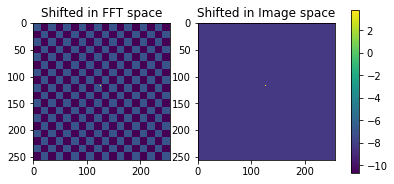

In [36]:
H=np.fft.fft2(img1)
[xF, yF] = np.meshgrid(255,255)
dx = 0.24
dy = 0.0003
H = H *np.exp(2*np.pi*(xF*dx + yF*dy)/256)
InvFFT = np.fft.ifft2(np.fft.ifftshift(H))
fig, ax = plt.subplots(1,2)
ax[0].imshow(np.real(InvFFT), cmap='viridis')
ax[1].imshow(img2, cmap='viridis')
cbar = plt.colorbar(fft2, location='right', ax=ax, fraction=0.05, shrink=0.75)
ax[0].set_title('Shifted in FFT space')
ax[1].set_title('Shifted in Image space')
plt.show()

# Part 2

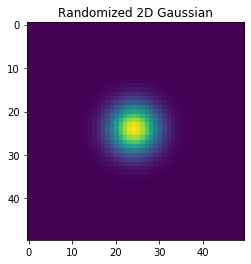

/home/jbc1216/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  


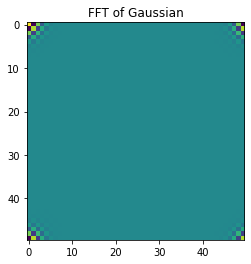

In [69]:
def gaus2d(x, y, mx=125, my=125, sx=20, sy=20):
    return 1. / (2. * np.pi * sx * sy) * np.exp(-((x - mx)**2. / (2. * sx**2.) + (y - my)**2. / (2. * sy**2.)))

x = np.linspace(0,255)
y = np.linspace(0,255)
x, y = np.meshgrid(x, y)
z = gaus2d(x, y)
fig, ax = plt.subplots(1,1)
ax.imshow(z, cmap='viridis')
ax.set_title('Randomized 2D Gaussian')
plt.show()

z2 = np.copy(z)
z2fft = np.fft.fft2(z2).astype(float)
fig, ax = plt.subplots(1,1)

ax.imshow(z2fft, cmap='viridis')
ax.set_title('FFT of Gaussian')
plt.show()

In [ ]:
# now i need to create analytic fourier transform of the gaussian data directly in fourier space